Мини-анализ выгруженного датасета из Яндекс.Метрики. Проанализируем распределение посещений сайта по дням, выясним, с какого браузера приходит больше всего ботов, посчитаем долю заходов конкретных типов пользователей с конкретного браузера от вообще всех-всех заходов на сайт. Выгрузим часть данных из Google SpreadSheets, и загрузим туда новый обновленный датафрейм.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('https://stepik.org/media/attachments/lesson/361618/step_1_lesson_7.csv')
data

,date,user_type,visits
0,2020-06-15,People,417.0
1,2020-06-15,Robots,177.0
2,2020-06-16,People,472.0
3,2020-06-16,Robots,91.0
4,2020-06-17,People,475.0
5,2020-06-17,Robots,138.0


In [3]:
# Посмотрим на распределение посещений сайта по дням:

data1 = data.pivot(index='date',columns='user_type',values='visits')
data1['diff'] = data1.People - data1.Robots
data1

user_type,People,Robots,diff
date,,,
2020-06-15,417.0,177.0,240.0
2020-06-16,472.0,91.0,381.0
2020-06-17,475.0,138.0,337.0


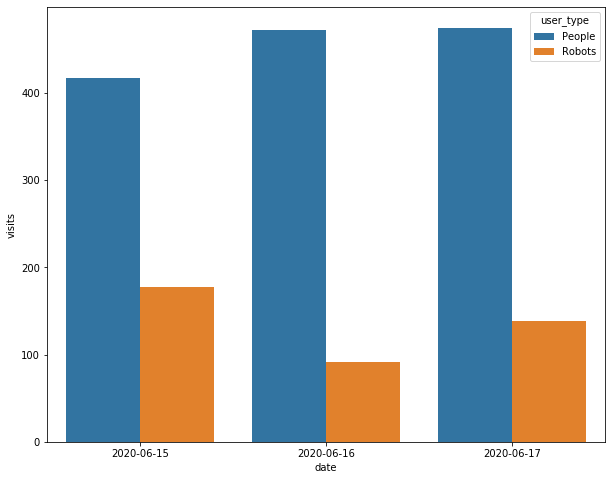

In [11]:
plt.figure(figsize=(10,8))
sns.barplot(data = data, x = 'date', y ='visits', hue='user_type')

In [4]:
data2 = pd.read_csv('https://stepik.org/media/attachments/lesson/361618/step_2_lesson_7.csv')
data2

,date,browser,visits
0,2020-06-15,Google Chrome,354.0
1,2020-06-15,Firefox,58.0
2,2020-06-15,Yandex Browser,54.0
3,2020-06-15,Safari,41.0
4,2020-06-15,Chrome Mobile,31.0
5,2020-06-15,Opera,16.0
6,2020-06-15,Mobile Safari,16.0
7,2020-06-15,Samsung Internet,9.0
8,2020-06-15,Edge,5.0
9,2020-06-15,UCWEB,4.0


In [5]:
# Определим процент посещений сайта Яндекс.Метрики с бразузера Google Chrome

data2.query('browser == "Google Chrome"').visits / data2.visits.sum() *100

0    59.59596
Name: visits, dtype: float64

In [6]:
# Выясним, с какого браузера приходит больше всего ботов

data3 = pd.read_csv('https://stepik.org/media/attachments/lesson/361618/step_3_lesson_7.csv')
data3

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0
5,2020-06-15,Firefox,People,27.0
6,2020-06-15,Safari,Robots,22.0
7,2020-06-15,Safari,People,19.0
8,2020-06-15,Mobile Safari,People,15.0
9,2020-06-15,Opera,People,11.0


In [7]:
# Преобразуем данные:

data3 = data3.pivot(index='browser',columns='user_type', values='visits')
data3 = data3.fillna(0)
data3 = data3.reset_index()
data3['percent'] = data3.Robots / (data3.People + data3.Robots) * 100
data3 = data3.sort_values('percent',ascending = False)
data3

# percent - доля посещений сайта ботами от общего числа посещений

user_type,browser,People,Robots,percent
11,UCWEB,0.0,4.0,100.000000
9,Safari,19.0,22.0,53.658537
5,Firefox,27.0,31.0,53.448276
2,Chromium,1.0,1.0,50.000000
8,Opera,11.0,5.0,31.250000
6,Google Chrome,250.0,104.0,29.378531
4,Edge,4.0,1.0,20.000000
13,Yandex Browser,47.0,7.0,12.962963
10,Samsung Internet,8.0,1.0,11.111111
7,Mobile Safari,15.0,1.0,6.250000


In [8]:
# Посчитаем долю заходов конкретных типов пользователей с конкретного браузера от вообще всех-всех заходов на 
# сайт за этот день (колонка per)

data4 = pd.read_csv('https://stepik.org/media/attachments/lesson/361618/step_4_lesson_7.csv')
data4['per'] = round(data4.visits / data4.visits.sum() * 100, 1)
data4

,date,browser,user_type,visits,per
0,2020-06-15,Google Chrome,People,250.0,42.1
1,2020-06-15,Google Chrome,Robots,104.0,17.5
2,2020-06-15,Yandex Browser,People,47.0,7.9
3,2020-06-15,Firefox,Robots,31.0,5.2
4,2020-06-15,Chrome Mobile,People,31.0,5.2
5,2020-06-15,Firefox,People,27.0,4.5
6,2020-06-15,Safari,Robots,22.0,3.7
7,2020-06-15,Safari,People,19.0,3.2
8,2020-06-15,Mobile Safari,People,15.0,2.5
9,2020-06-15,Opera,People,11.0,1.9


In [38]:
# Загрузим датафрейм с Google SpreadSheets

from io import BytesIO
import requests
r = requests.get('https://docs.google.com/spreadsheets/d/e/2PACX-1vQWMsvBTVio9C7IOOxfFO9C15BRHyME-_ENHqBodDOjuiHwk9fCuF5hUVmDs497PZOqPYK3exdSikOK/pub?gid=1006633900&single=true&output=csv')
data = r.content

df = pd.read_csv(BytesIO(data))
df

,date,browser,user_type,users
0,2020-06-15,Google Chrome,People,240.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,44.0
3,2020-06-15,Chrome Mobile,People,30.0
4,2020-06-15,Firefox,Robots,29.0
5,2020-06-15,Firefox,People,26.0
6,2020-06-15,Safari,Robots,20.0
7,2020-06-15,Safari,People,17.0
8,2020-06-15,Mobile Safari,People,14.0
9,2020-06-15,Opera,People,10.0


In [39]:
# Объедим его с уже имеющимися данными:

df = df.merge(data4)
df

,date,browser,user_type,users,visits,per
0,2020-06-15,Google Chrome,People,240.0,250.0,42.1
1,2020-06-15,Google Chrome,Robots,104.0,104.0,17.5
2,2020-06-15,Yandex Browser,People,44.0,47.0,7.9
3,2020-06-15,Chrome Mobile,People,30.0,31.0,5.2
4,2020-06-15,Firefox,Robots,29.0,31.0,5.2
5,2020-06-15,Firefox,People,26.0,27.0,4.5
6,2020-06-15,Safari,Robots,20.0,22.0,3.7
7,2020-06-15,Safari,People,17.0,19.0,3.2
8,2020-06-15,Mobile Safari,People,14.0,15.0,2.5
9,2020-06-15,Opera,People,10.0,11.0,1.9


In [40]:
# Посчитаем количество визитов на человека (отношение visits к users) в разрезе по браузеру и значениям Robots/People

df['visits/users'] = df.visits / df.users
df

,date,browser,user_type,users,visits,per,visits/users
0,2020-06-15,Google Chrome,People,240.0,250.0,42.1,1.041667
1,2020-06-15,Google Chrome,Robots,104.0,104.0,17.5,1.000000
2,2020-06-15,Yandex Browser,People,44.0,47.0,7.9,1.068182
3,2020-06-15,Chrome Mobile,People,30.0,31.0,5.2,1.033333
4,2020-06-15,Firefox,Robots,29.0,31.0,5.2,1.068966
5,2020-06-15,Firefox,People,26.0,27.0,4.5,1.038462
6,2020-06-15,Safari,Robots,20.0,22.0,3.7,1.100000
7,2020-06-15,Safari,People,17.0,19.0,3.2,1.117647
8,2020-06-15,Mobile Safari,People,14.0,15.0,2.5,1.071429
9,2020-06-15,Opera,People,10.0,11.0,1.9,1.100000


In [14]:
# Отправка датафрейма в Google Sheets в новую предварительно созданную таблицу :

import pandas as pd
import gspread
from df2gspread import df2gspread as d2g
from oauth2client.service_account import ServiceAccountCredentials


scope = ['https://spreadsheets.google.com/feeds',
         'https://www.googleapis.com/auth/drive']


my_mail = 'kandybkodaria@gmail.com'
# путь до файла с ключом :
path_to_credentials = '../Downloads/vivid-reality-296813-5ce0534d24e7.json'  


# Authorization
credentials = ServiceAccountCredentials.from_json_keyfile_name(path_to_credentials, scope)
gs = gspread.authorize(credentials)


<Worksheet 'Master' id:1726767099>

In [16]:
# Create empty table
table_name = 'A new spreadsheet'

sheet = gs.create(table_name)


# Make it visible to other guys
sheet.share(my_mail, perm_type='user', role='writer')

In [18]:
# Загрузка датафрейма в новую пустую таблицу
sheet = 'Sheet1'
table_name = 'A new spreadsheet'
d2g.upload(data4, table_name, sheet, credentials=credentials, row_names=True)

<Worksheet 'Sheet1' id:0>